In [ ]:
%matplotlib inline
from pynq.pmods import PMOD_ADC
import time
import matplotlib.pyplot as plt

# initialize ADC on PMOD 1 (JB).
# The ADC DA4 has 4 input channels at 12 bit resolution, however only the first 3: 
# V1, V2 and V3 (form 0 to 2) can be used.
# PMOD mapping is: PMOD 1 -> JB, PMOD 2 -> JC, PMOD 3 -> JD, PMOD 4 -> JE
pmod_adc = PMOD_ADC(1)

# read the tension value for V1 (V1 -> 0) and print it
#value = pmod_adc.read(0)
#print("Current voltage: " + str(value) + "V")

# start logging on V3 (V3 -> 2) with log interval of 1 ms
# NOTE: the current driver allows to log only one input at a time,
# to get data from multiple inputs at the same time you need to get them manually within a loop
#2 è IL CANALE DI LETTURA , 10 INTERVALLO TRA OGNI CAMPIONE(ms)
pmod_adc.start_log(2, 1)

# TEMPO DI ACQUISIZIONE

time.sleep(3)

# get and stop logging
values = pmod_adc.get_log()
print("Voltage values: " + str(values))

# draw graph
plt.plot(range(len(values)), values, 'r')
plt.title('ADC data')
plt.show()

In [ ]:
import numpy as np
np.savetxt("Suono4.npy",values)

999


C:\Users\giorg\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
C:\Users\giorg\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
C:\Users\giorg\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version


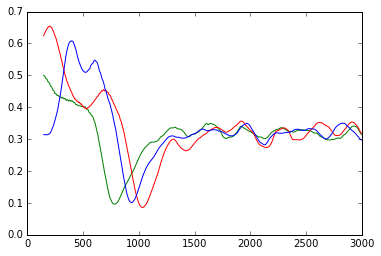

In [79]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
segnale4=np.loadtxt("Suono4.npy")
segnale=np.loadtxt("Suono3.npy")
template=np.loadtxt("Suono2.npy")
print(len(segnale))

mediasegnale2=pd.rolling_mean(template,50)
mediasegnale3=pd.rolling_mean(segnale,50)
np.savetxt("Template3.npy",mediasegnale3[50:len(mediasegnale3)])
mediasegnale4=pd.rolling_mean(segnale4,50)

t=np.arange(0,len(segnale)*3,3)
plt.plot(t,mediasegnale2,color='g')
plt.plot(t,mediasegnale3,color='r')
plt.plot(t,mediasegnale4,color='b')
plt.show()
    

In [ ]:
segnale=np.loadtxt("Suono.npy")

segnaleP=segnale-mediasegnale

t=np.arange(0,len(segnale)*3,3)
plt.figure(figsize=(10,10))
plt.plot(t,segnaleP,color='g')
plt.show()
    

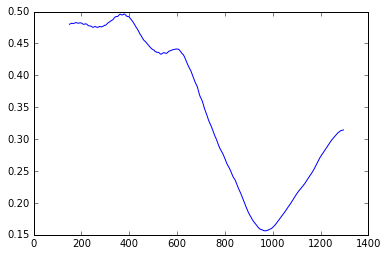

In [25]:
totale=mediasegnale2+mediasegnale3+mediasegnale4
media=totale/3
media=media[50:1300//3]
plt.plot(t[50:1300//3],media)
plt.show()
np.savetxt("Template.npy",media)

In [89]:
#cross-correlazione tra finestra con zero-padding e segnale 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import rfft, irfft

def calcoloCCR(data, arrwnd):

#le due liste da confrontare devono avere stessa lunghezza

    template=arrwnd.tolist()
    
    #Zero padding
    for i in range (len(arrwnd),len(data)):
        template.append(0)

    # Fast Fourier Transform (FFT)
    Data= rfft(data)
   
    # Inverto il vettore template
    tempY = []
    while len(template) > 0:
        tempY.append(template.pop())
    
    Y = rfft(tempY)

    # Faccio la formula inversa della FFT
    CrossCorrelazione = irfft(Data*Y)
    print(len(CrossCorrelazione))
    
    #Normalizzazione
    DataSTD=np.nanstd(data)
    TemSTD=np.nanstd(template)
    print(DataSTD)
    print(TemSTD)
    
    x=np.arange(len(CrossCorrelazione))
    plt.plot(x,CrossCorrelazione)
    plt.xlabel("Campioni")
    plt.ylabel("CrossCorrelazione")
    plt.show()



998
0.0851004262312
nan


C:\Users\giorg\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1136: RuntimeWarning: Degrees of freedom <= 0 for slice.
  warnings.warn("Degrees of freedom <= 0 for slice.", RuntimeWarning)


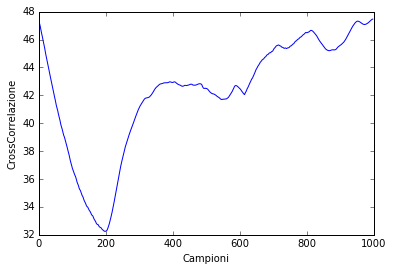

In [91]:
segnale=np.loadtxt("Suono2.npy")
arrwnd=np.loadtxt("Template.npy")
calcoloCCR(segnale,arrwnd)
